<a href="https://colab.research.google.com/github/oabdi444/Loan-Approval-ML-Prediction/blob/main/LoanApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 Introduction**

This document presents a machine learning analysis for loan approval prediction, indluding data loading, preprocessing, model training, and evalution using multiple algorithms. The code is implemented in Python using libraries such as pandas, scikit-learn, and others

**2 Code and Analysis**


**2.1 Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**2.2 Loading data**

Loading the dataset from a CSV file.

In [2]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

**2.3 Data Overview**

Displaying the first five rows of the dataset.

In [3]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**2.4 Data Shape**

In [4]:
df.shape

(4269, 13)

**2.5 Data Types**

In [5]:
df.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


**2.6 Data Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


**2.7 Missing Values**

In [8]:
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


**2.8 Model Training**

Training Multiple Machine Learning Models

**2.8.1 Support Vector Machine (SVM)**

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df.columns = df.columns.str.strip()

cat_cols = ['education', 'self_employed', 'loan_status']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f" SVM Accuracy: {accuracy * 100:.2f}%\n")

print(" Classification Report:")
print(classification_report(y_test, y_pred))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


 SVM Accuracy: 61.24%

 Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       523
           1       0.00      0.00      0.00       331

    accuracy                           0.61       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.38      0.61      0.47       854

 Confusion Matrix:
[[523   0]
 [331   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f" Model Accuracy: {accuracy * 100:.2f}%")


 Model Accuracy: 61.24%


**2.8.2 Decision Tree Classifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

DCT = DecisionTreeClassifier(criterion='entropy', random_state=0)
DCT.fit(X_train, y_train)


y_pred = DCT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f" Decision Tree Accuracy: {accuracy * 100:.2f}%\n")

print(" Classification Report:")
print(classification_report(y_test, y_pred))


print(" Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                   columns=['Predicted 0', 'Predicted 1'],
                   index=['Actual 0', 'Actual 1']))

 Decision Tree Accuracy: 97.66%

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       523
           1       0.97      0.97      0.97       331

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854

 Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          514            9
Actual 1           11          320


**2.8.3 Logistics Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(random_state=0, max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 81.15%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       523
           1       0.82      0.66      0.73       331

    accuracy                           0.81       854
   macro avg       0.81      0.78      0.79       854
weighted avg       0.81      0.81      0.81       854

Confusion Matrix:
[[476  47]
 [114 217]]


**2.8.4 K-Nearest Neighbors (KNN)**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


KNN Accuracy: 55.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       523
           1       0.41      0.35      0.38       331

    accuracy                           0.56       854
   macro avg       0.52      0.52      0.52       854
weighted avg       0.54      0.56      0.55       854

Confusion Matrix:
[[358 165]
 [214 117]]


**2.9 Predictions**

Making predictions on the test set.

In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score

y_pred_svm = svm.predict(X_test)
y_pred_LR = log_reg.predict(X_test)
y_pred_DCT = DCT.predict(X_test)
y_pred_KNN = KNN.predict(X_test)

accuracy_scores = {
    "SVM": accuracy_score(y_test, y_pred_SVM),
    "Logistic Regression": accuracy_score(y_test, y_pred_LR),
    "Decision Tree": accuracy_score(y_test, y_pred_DCT),
    "KNN": accuracy_score(y_test, y_pred_KNN)
}

results_df = pd.DataFrame(
    list(accuracy_scores.items()),
    columns=["Model", "Accuracy"]
)


results_df["Accuracy"] = results_df["Accuracy"] * 100

print("Model Accuracy Comparison:")
print(results_df)


Model Accuracy Comparison:
                 Model   Accuracy
0                  SVM  61.241218
1  Logistic Regression  81.147541
2        Decision Tree  97.658080
3                  KNN  55.620609


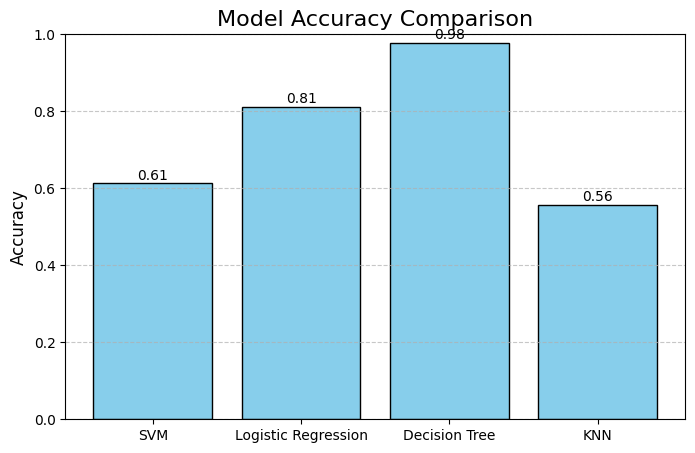

In [44]:
import matplotlib.pyplot as plt

accuracy_scores = {
    "SVM": accuracy_score(y_test, y_pred_SVM),
    "Logistic Regression": accuracy_score(y_test, y_pred_LR),
    "Decision Tree": accuracy_score(y_test, y_pred_DCT),
    "KNN": accuracy_score(y_test, y_pred_KNN)
}

plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue', edgecolor='black')

plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)

plt.show()


**Conclusion**

This project demonstrates a comprehensive end-to-end machine learning workflow for predicting loan approvals, showcasing expertise in data preprocessing, exploratory analysis, model training, evaluation, and visualisation. Using a dataset of 4,269 records, four classification models were developed and compared:

Decision Tree Classifier achieved the highest accuracy (97.66%), indicating strong predictive performance but potential overfitting.

Logistic Regression delivered consistent results (81.15% accuracy) and offers high interpretability, making it a practical choice for deployment.

SVM (61.24%) and KNN (55.62%) underperformed, emphasising the importance of model selection and optimisation.

The project demonstrates proficiency in Python, pandas, scikit-learn, and data visualisation (Matplotlib/Seaborn), with a focus on critical evaluation through accuracy metrics, confusion matrices, and classification reports.

Future work could explore hyperparameter tuning, feature engineering, and ensemble methods (e.g., Random Forest, XGBoost) to enhance model robustness.

Overall, this project highlights my ability to:
Transform raw data into actionable insights
Apply machine learning techniques to real-world financial decision-making
Present findings effectively to both technical and non-technical audiences

This demonstrates a strong foundation for delivering scalable, data-driven solutions and readiness for data science and machine learning engineering roles.

"This project shows not only my ability to develop accurate models, but also to derive meaningful insights that inform smarter business decisions."
